In [40]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import Matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
import matplotlib.gridspec as gridspec
from sklearn.metrics import log_loss
from scipy.stats import probplot, shapiro

In [42]:
# Import the dataset
df_airline =  pd.read_csv("C:\\Users\\decent\\OneDrive\\Desktop\\Railway_Survey_Analysis\\Airline.csv", index_col=0)
pd.set_option('display.max_columns', None)
df_airline.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


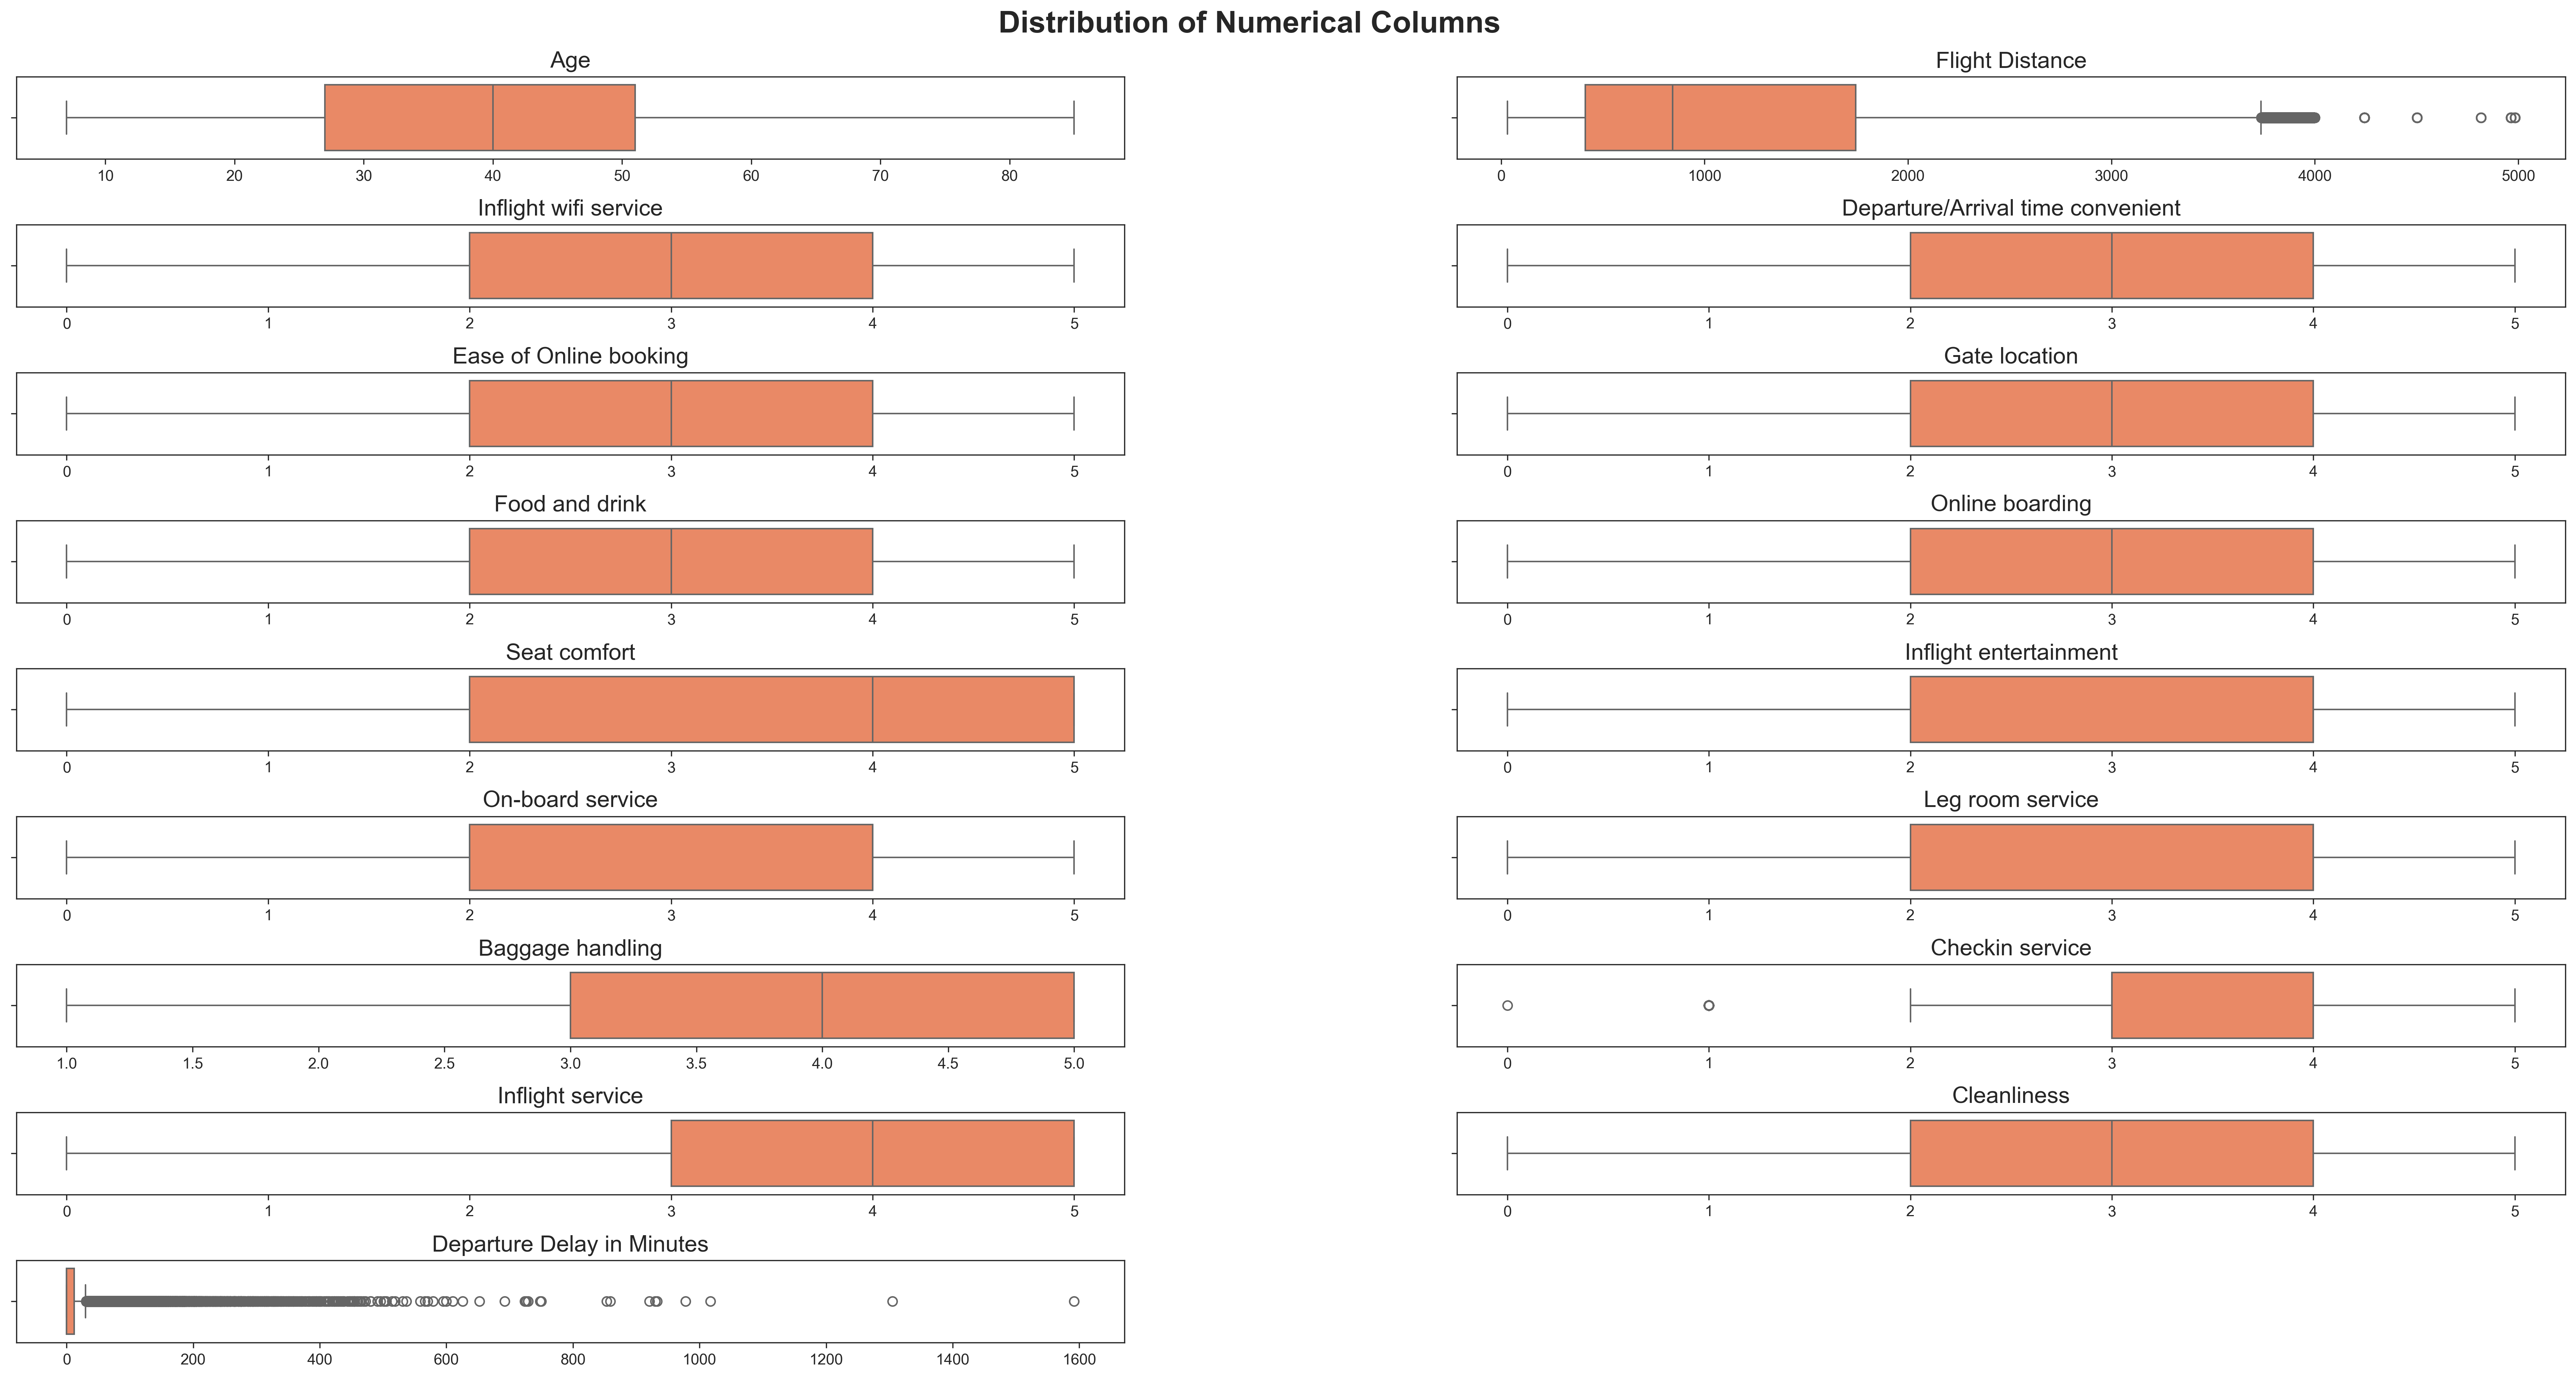

In [61]:
df_numerical_features = df_airline._get_numeric_data()

sns.set_style('ticks')
fig = plt.figure(figsize=(30,15),dpi=300)

for i,column_name in enumerate(df_numerical_features):
    if i < 17:
        plt.subplot(9,2,i+1)
        ax=sns.boxplot(x=column_name,data=df_numerical_features,color="coral")
        ax.set_title(column_name,size=15)
        plt.xlabel('')

plt.subplots_adjust(hspace = 0.8, wspace=0.3)
fig.suptitle("Distribution of Numerical Columns",size=20,fontweight='bold',y=0.92)
plt.show()

In [46]:
# Drop irrelevant column
df_airline.drop(columns=["id"], inplace=True)

In [48]:
# Fill missing values
df_airline["Arrival Delay in Minutes"].fillna(df_airline["Arrival Delay in Minutes"].median(), inplace=True)

C:\Users\decent\AppData\Local\Temp\ipykernel_23904\1746255191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_airline["Arrival Delay in Minutes"].fillna(df_airline["Arrival Delay in Minutes"].median(), inplace=True)


In [50]:
print("Dataset Shape:", df_airline.shape)
print("\nDataset Info:\n")
print(df_airline.info())
print("\nMissing Values:\n", df_airline.isnull().sum())
print("\nSummary Stats:\n", df_airline.describe())

Dataset Shape: (103904, 23)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  

In [63]:
df_airline.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# Descriptive Analysis

In [66]:
df_airline.describe().transpose().style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,103904.000000,39.379706,15.114964,7.000000,27.000000,40.000000,51.000000,85.000000
Flight Distance,103904.000000,1189.448375,997.147281,31.000000,414.000000,843.000000,1743.000000,4983.000000
Inflight wifi service,103904.000000,2.729683,1.327829,0.000000,2.000000,3.000000,4.000000,5.000000
Departure/Arrival time convenient,103904.000000,3.060296,1.525075,0.000000,2.000000,3.000000,4.000000,5.000000
Ease of Online booking,103904.000000,2.756901,1.398929,0.000000,2.000000,3.000000,4.000000,5.000000
Gate location,103904.000000,2.976883,1.277621,0.000000,2.000000,3.000000,4.000000,5.000000
Food and drink,103904.000000,3.202129,1.329533,0.000000,2.000000,3.000000,4.000000,5.000000
Online boarding,103904.000000,3.250375,1.349509,0.000000,2.000000,3.000000,4.000000,5.000000
Seat comfort,103904.000000,3.439396,1.319088,0.000000,2.000000,4.000000,5.000000,5.000000
Inflight entertainment,103904.000000,3.358158,1.332991,0.000000,2.000000,4.000000,4.000000,5.000000


# Exploratory Data Analysis

In [68]:
numerical_features=["Age","Departure Delay in Minutes" ,"Arrival Delay in Minutes","Flight Distance"]

# rest all are actually categorical
categorical_features=[x for x in df_airline.columns if x not in numerical_features]

# converting all ordinal features to categorical features
df_airline[categorical_features]=df_airline[categorical_features].astype("category")

#verifying the change
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding                

C:\Users\decent\AppData\Local\Temp\ipykernel_23904\2825734173.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_airline, x="satisfaction", palette="viridis")


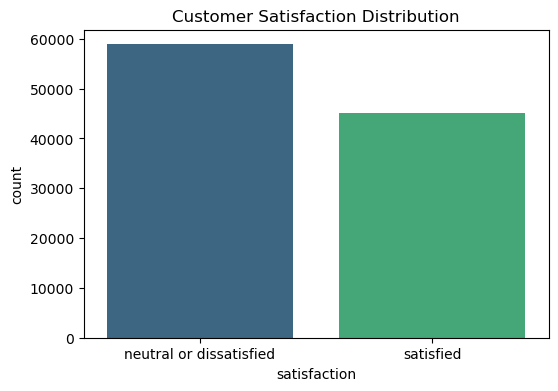

In [53]:
#Target Variable Distribution

plt.figure(figsize=(6,4))
sns.countplot(data=df_airline, x="satisfaction", palette="viridis")
plt.title("Customer Satisfaction Distribution")
plt.show()

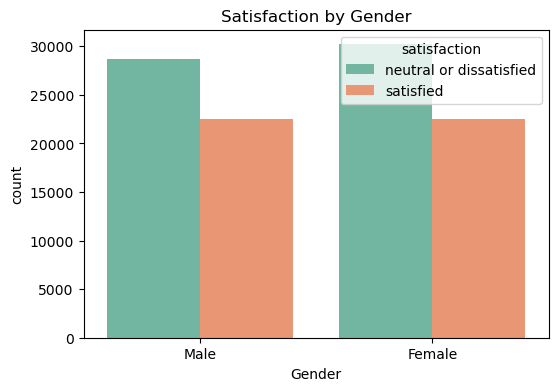

In [55]:
#Gender vs Satisfaction

plt.figure(figsize=(6,4))
sns.countplot(data=df_airline, x="Gender", hue="satisfaction", palette="Set2")
plt.title("Satisfaction by Gender")
plt.show()

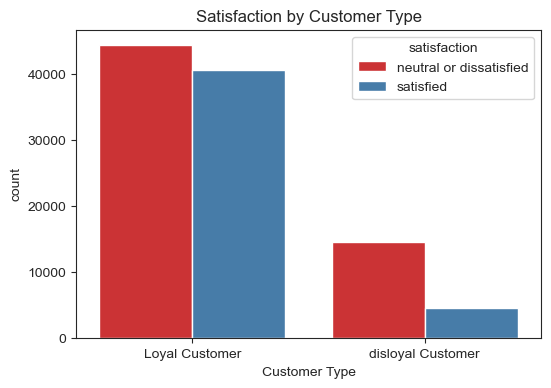

In [70]:
#Customer Type vs Satisfaction
plt.figure(figsize=(6,4))
sns.countplot(data=df_airline, x="Customer Type", hue="satisfaction", palette="Set1")
plt.title("Satisfaction by Customer Type")
plt.show()

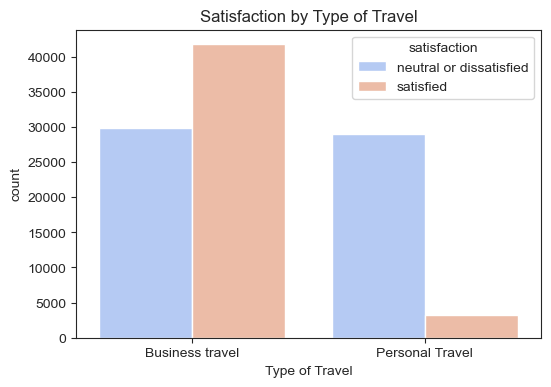

In [72]:
#Type of Travel vs Satisfaction
plt.figure(figsize=(6,4))
sns.countplot(data=df_airline, x="Type of Travel", hue="satisfaction", palette="coolwarm")
plt.title("Satisfaction by Type of Travel")
plt.show()


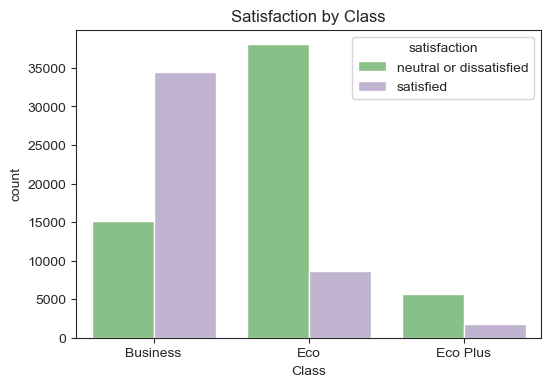

In [74]:
#Class vs Satisfaction
plt.figure(figsize=(6,4))
sns.countplot(data=df_airline, x="Class", hue="satisfaction", palette="Accent")
plt.title("Satisfaction by Class")
plt.show()

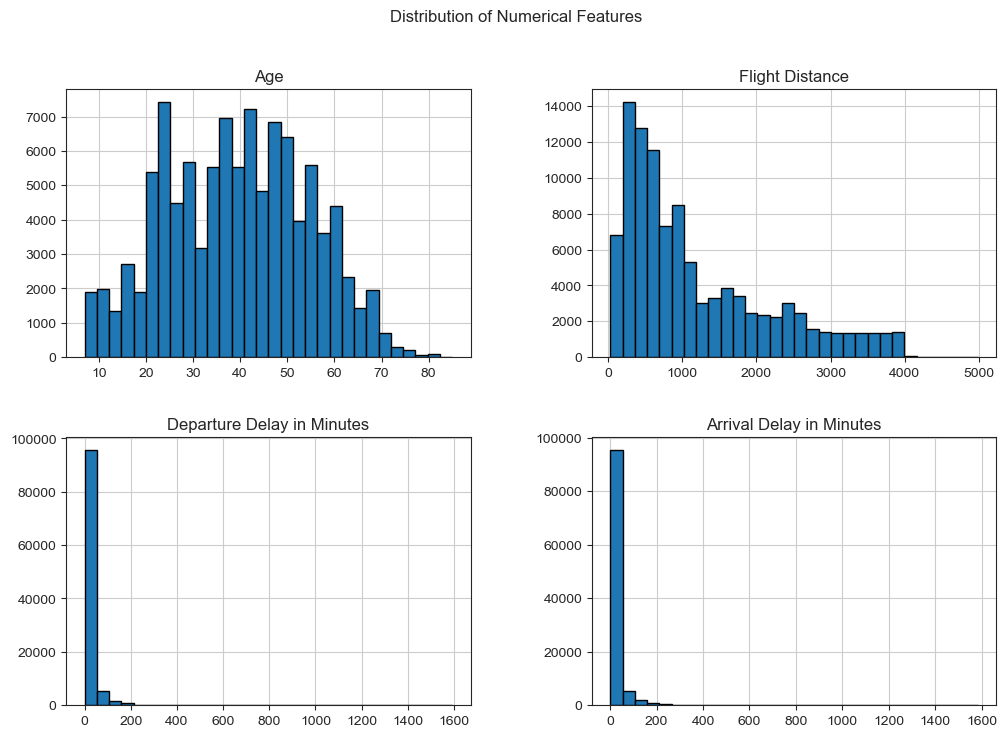

In [76]:
#Numerical Feature Distributions
num_cols = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
df_airline[num_cols].hist(figsize=(12,8), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Features")
plt.show()

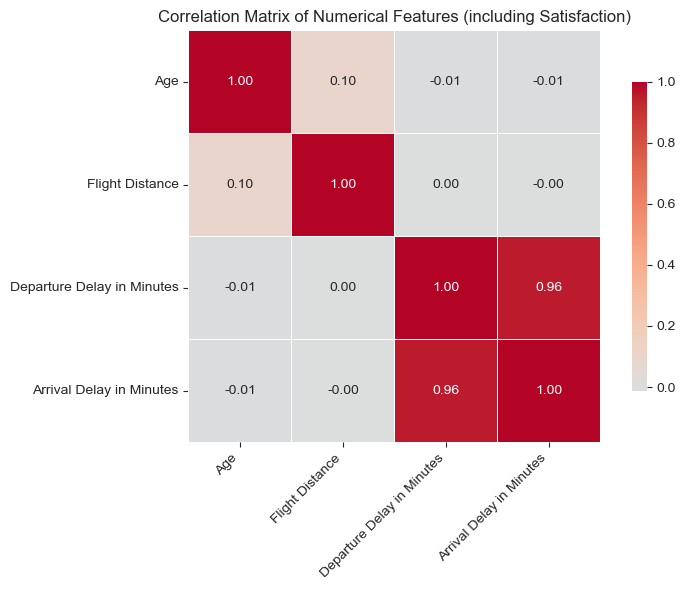

In [80]:
# Compute correlation matrix for all numerical features (including the binary satisfaction)
numeric_cols = df_airline.select_dtypes(include='number').columns
corr_matrix = df_airline[numeric_cols].corr()

# Plot correlation heatmap with values
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    annot=True,              
    fmt=".2f",               
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Numerical Features (including Satisfaction)')
plt.tight_layout()
plt.show()

In [86]:
# Create binary satisfaction column (1 = satisfied, 0 = neutral or dissatisfied)
df_airline["satisfaction_binary"] = df_airline["satisfaction"].apply(lambda x: 1 if x == "satisfied" else 0)


C:\Users\decent\AppData\Local\Temp\ipykernel_23904\1583119352.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_airline.pivot_table(


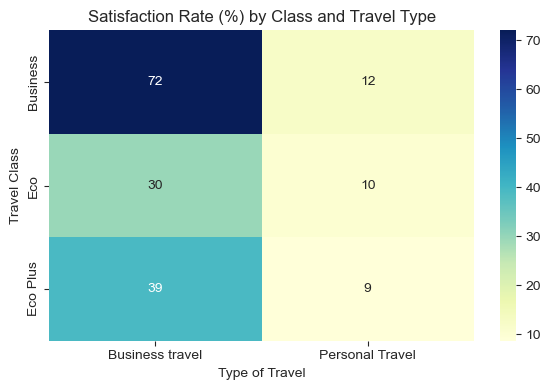

In [90]:
# Ensure binary satisfaction column exists & is numeric
df_airline["satisfaction_binary"] = df_airline["satisfaction"].apply(lambda x: 1 if x == "satisfied" else 0).astype(int)

# Pivot table of satisfaction rate by Class and Type of Travel
pivot = df_airline.pivot_table(
    index='Class',
    columns='Type of Travel',
    values='satisfaction_binary',
    aggfunc='mean'
) * 100

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Satisfaction Rate (%) by Class and Travel Type")
plt.ylabel("Travel Class")
plt.xlabel("Type of Travel")
plt.tight_layout()
plt.show()


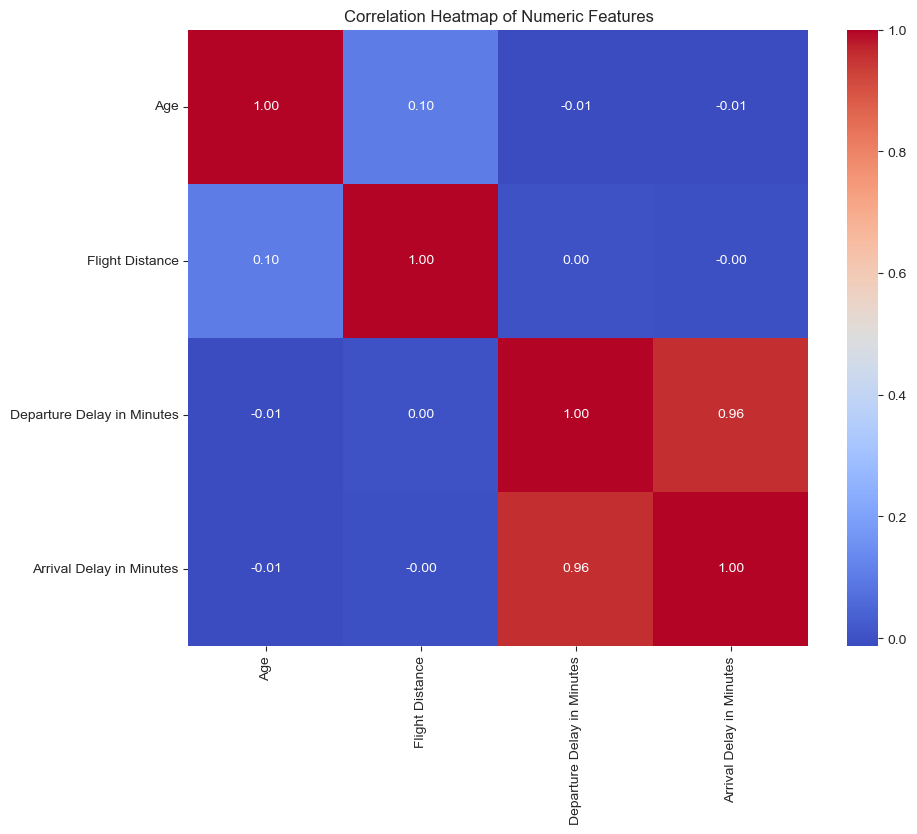

In [96]:
# Selecting only numeric columns
numeric_df = df_airline.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


C:\Users\decent\AppData\Local\Temp\ipykernel_23904\811234872.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\decent\AppData\Local\Temp\ipykernel_23904\811234872.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\decent\AppData\Local\Temp\ipykernel_23904\811234872.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\decent\AppData\Local\Temp\ipykernel_23904\811234872.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\decent\AppData\Local\Temp\ipykernel_23904\811234872.py:11: FutureWarning: 

The `ci` parameter is deprecate

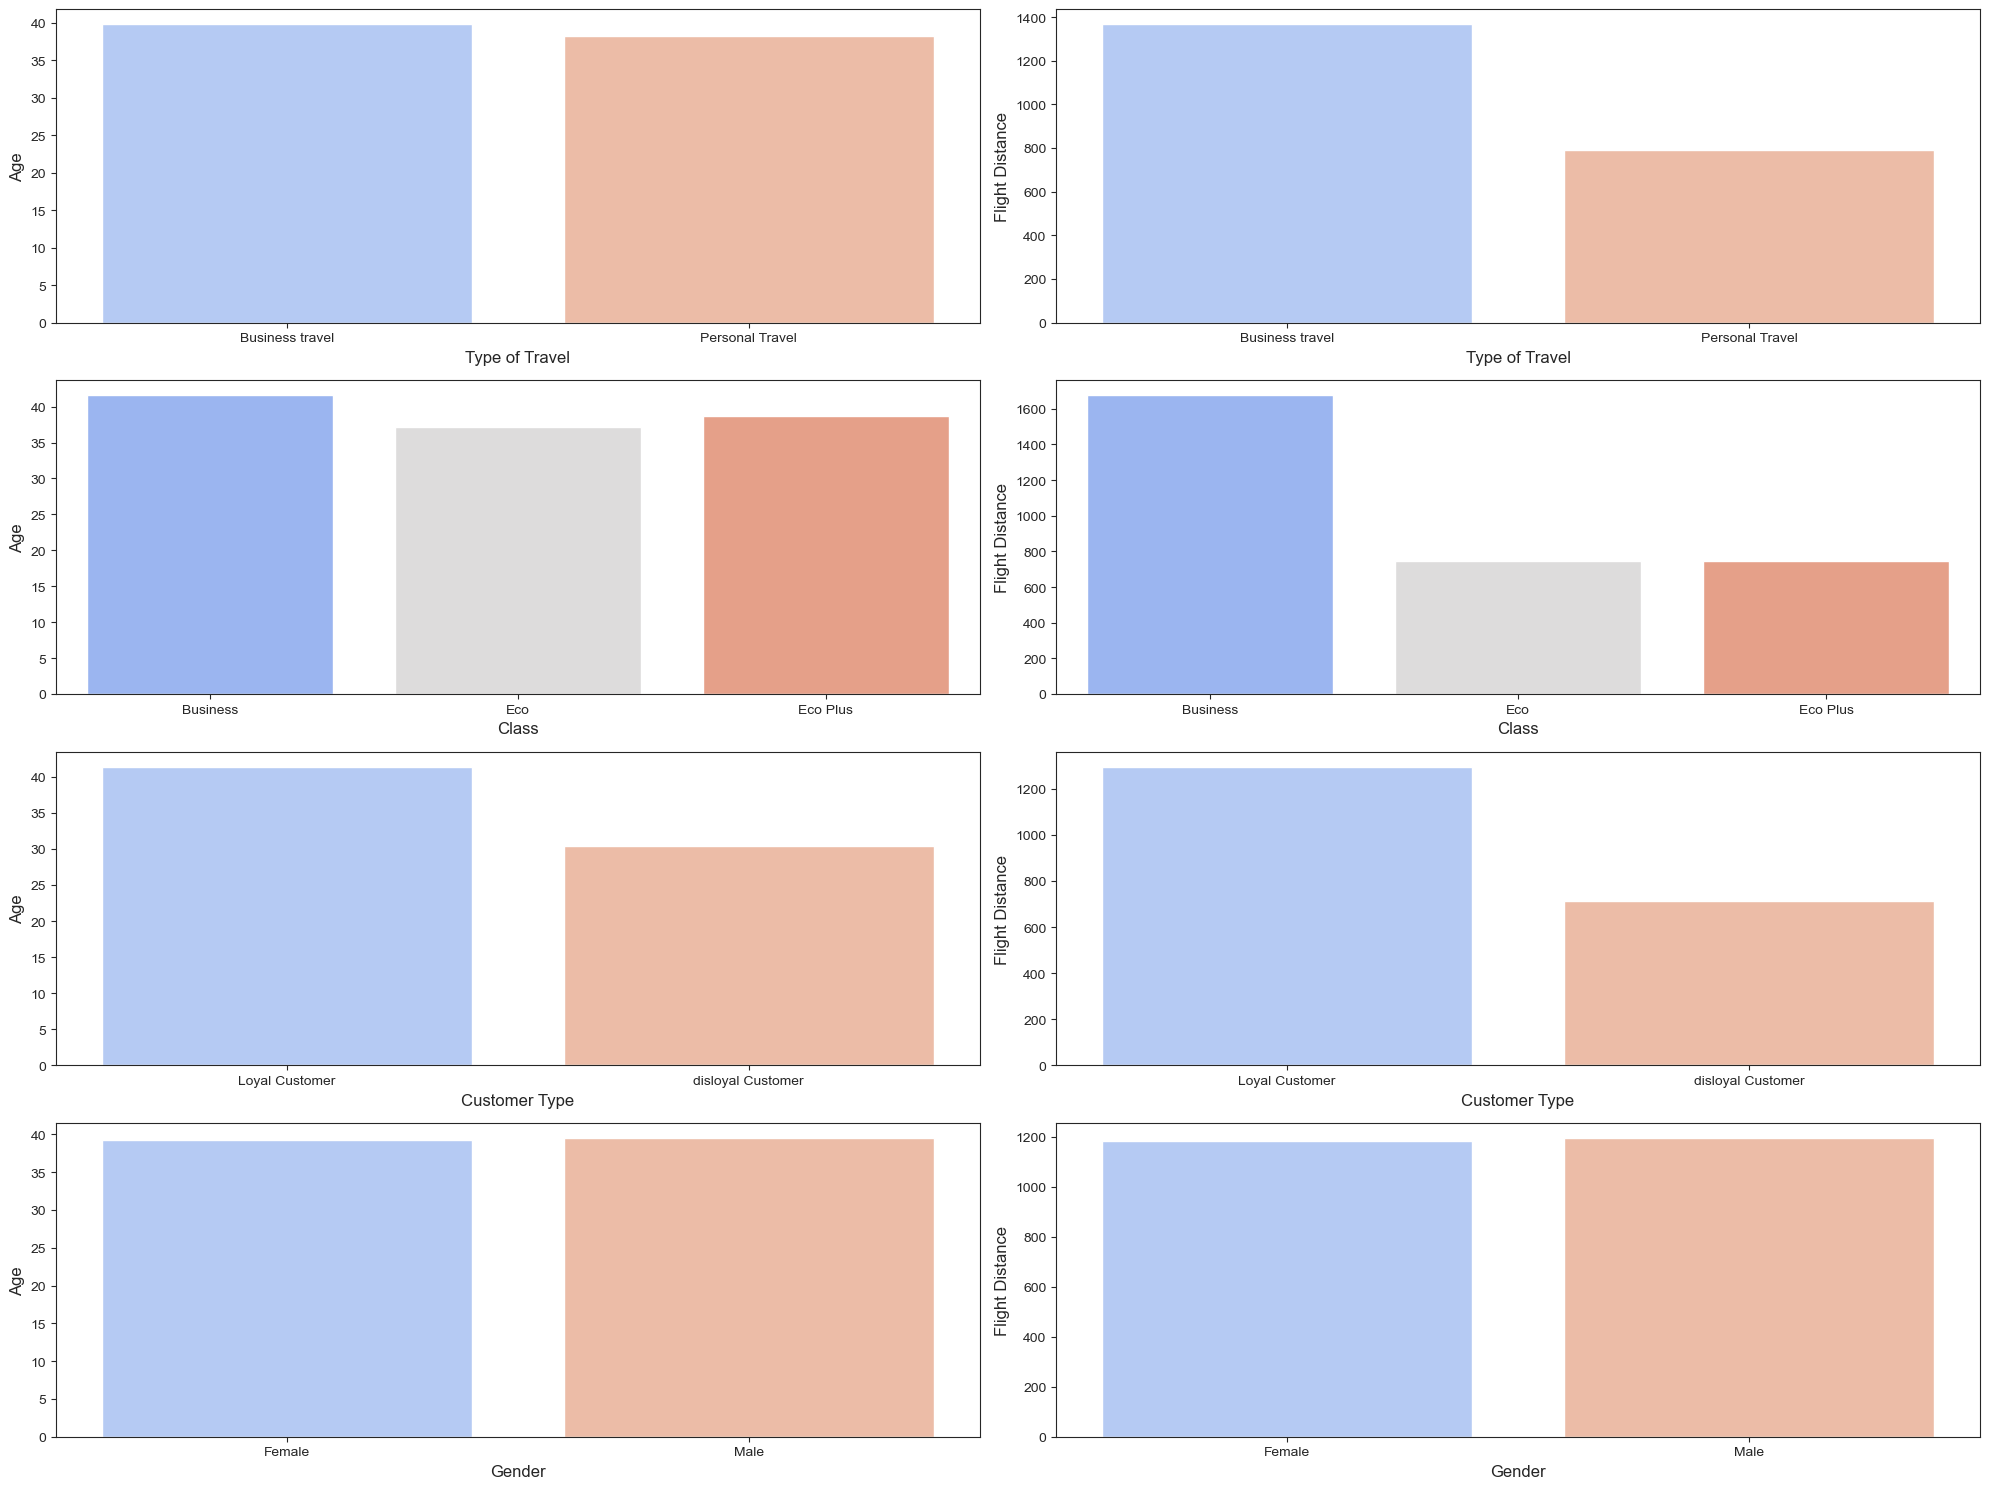

In [106]:
cat = ['Type of Travel', 'Class', 'Customer Type', 'Gender']
numerical = ['Age', 'Flight Distance']

plt.figure(figsize=(20, 15))

for i, cat_col in enumerate(cat):
    for j, num_col in enumerate(numerical):
        plt.subplot(len(cat), len(numerical), i * len(numerical) + j + 1)
        
        # Colorful barplot
        sns.barplot(
            x=cat_col, 
            y=num_col, 
            data=df_airline, 
            palette="coolwarm",  # You can try 'husl', 'Spectral', 'coolwarm', etc.
            ci=None  # it removes error bars for a cleaner look
        )
        
        plt.xlabel(cat_col, fontsize=12)
        plt.ylabel(num_col, fontsize=12)

plt.tight_layout()
plt.show()


In [108]:
#Customers who travel for business purpose are more likely to take longer distance flight.

#As flight distance increase customers are more likely to take business calss.

#Loyal customers have more mean age compare to disloyal customer.

#Loyal customers take long distance flight.

#There are no relation of Age and Flight Disatnce with gender.

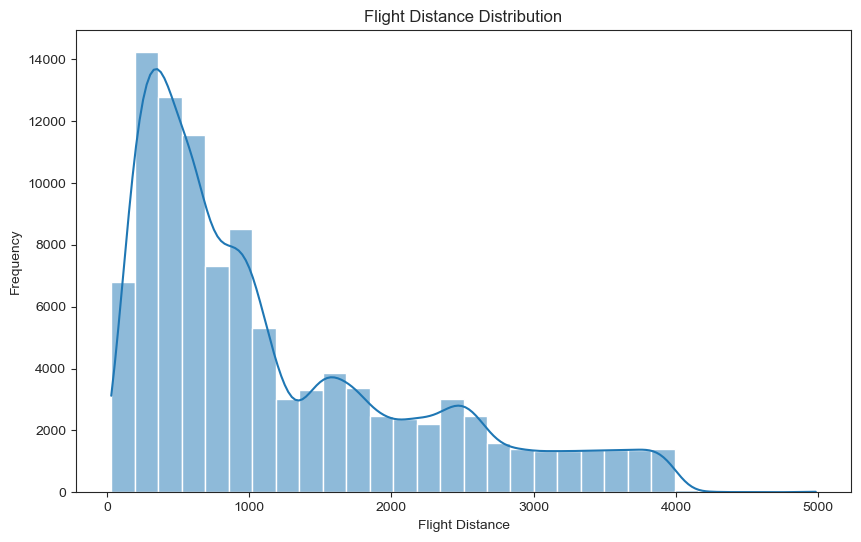

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Flight Distance Distribution
plt.figure(figsize=(10,6))
sns.histplot(df_airline['Flight Distance'], bins=30, kde=True)
plt.title('Flight Distance Distribution')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()




In [ ]:
#Flight Distance Distribution: Most flights are short to medium in range, with a long tail for long-haul routes.

C:\Users\decent\AppData\Local\Temp\ipykernel_23904\3144257343.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_airline, x='Age Group', palette='viridis')


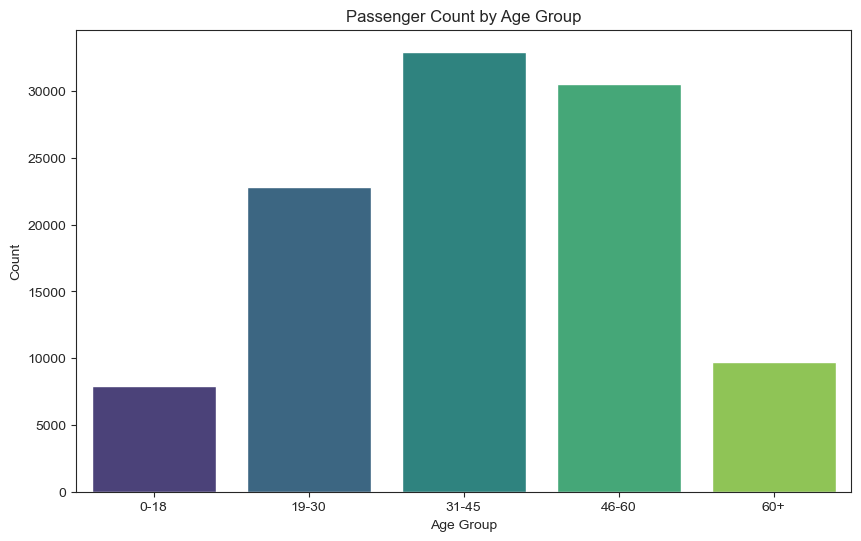

In [117]:
# Age Group Counts
# Define age groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df_airline['Age Group'] = pd.cut(df_airline['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.countplot(data=df_airline, x='Age Group', palette='viridis')
plt.title('Passenger Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()



In [ ]:
#Age Group Count: The majority of passengers are aged between 26 and 55, with the 36–45 group being the most represented.

In [123]:
#Clean column names: remove extra spaces, convert to lowercase, replace spaces with underscores
df_airline.columns = df_airline.columns.str.strip().str.lower().str.replace(' ', '_')

# Checking the cleaned column names
print(df_airline.columns.tolist())

['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'flight_distance', 'inflight_wifi_service', 'departure/arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'satisfaction', 'satisfaction_binary', 'age_group']


C:\Users\decent\AppData\Local\Temp\ipykernel_23904\2763159913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_airline, x='class', y='cleanliness', palette='Set2')


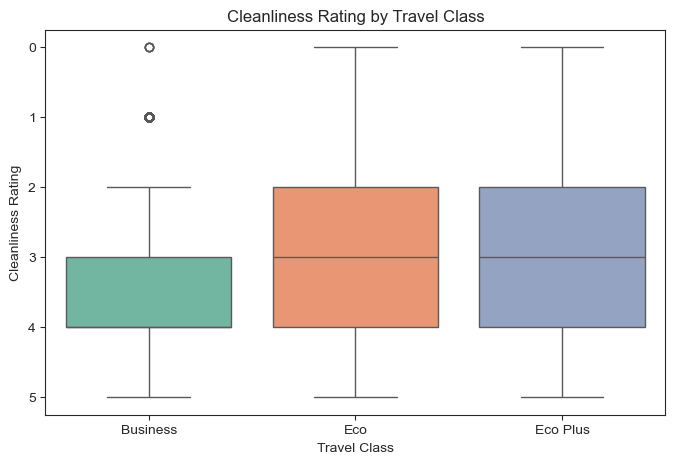

In [131]:
# Cleanliness Rating by Travel Class
plt.figure(figsize=(8,5))
sns.boxplot(data=df_airline, x='class', y='cleanliness', palette='Set2')
plt.title('Cleanliness Rating by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Cleanliness Rating')
plt.show()


In [133]:
#Cleanliness Ratings by Travel Class: Business class passengers consistently give higher cleanliness ratings compared to Eco and Eco Plus.

C:\Users\decent\AppData\Local\Temp\ipykernel_23904\650882947.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_airline, x='flight_distance_group', y='satisfaction_binary', palette='coolwarm', ci=None)
C:\Users\decent\AppData\Local\Temp\ipykernel_23904\650882947.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_airline, x='flight_distance_group', y='satisfaction_binary', palette='coolwarm', ci=None)


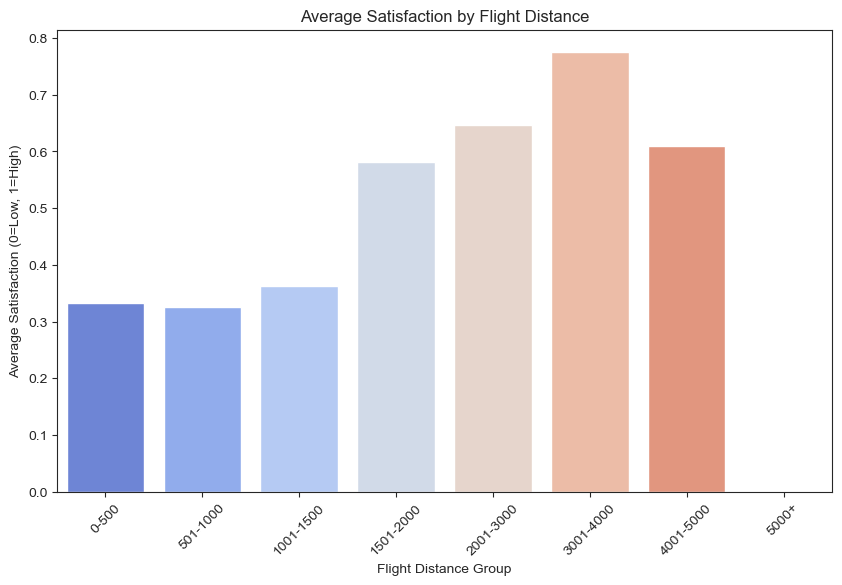

In [136]:
# Creatingflight distance bins
bins = [0, 500, 1000, 1500, 2000, 3000, 4000, 5000, 10000]
labels = ['0-500','501-1000','1001-1500','1501-2000','2001-3000','3001-4000','4001-5000','5000+']
df_airline['flight_distance_group'] = pd.cut(df_airline['flight_distance'], bins=bins, labels=labels, right=False)

# Plotting average satisfaction per flight distance group
plt.figure(figsize=(10,6))
sns.barplot(data=df_airline, x='flight_distance_group', y='satisfaction_binary', palette='coolwarm', ci=None)
plt.title('Average Satisfaction by Flight Distance')
plt.xlabel('Flight Distance Group')
plt.ylabel('Average Satisfaction (0=Low, 1=High)')
plt.xticks(rotation=45)
plt.show()

C:\Users\decent\AppData\Local\Temp\ipykernel_23904\1222687292.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_airline, x='class', y='satisfaction_binary', palette='Set2', ci=None)
C:\Users\decent\AppData\Local\Temp\ipykernel_23904\1222687292.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_airline, x='class', y='satisfaction_binary', palette='Set2', ci=None)


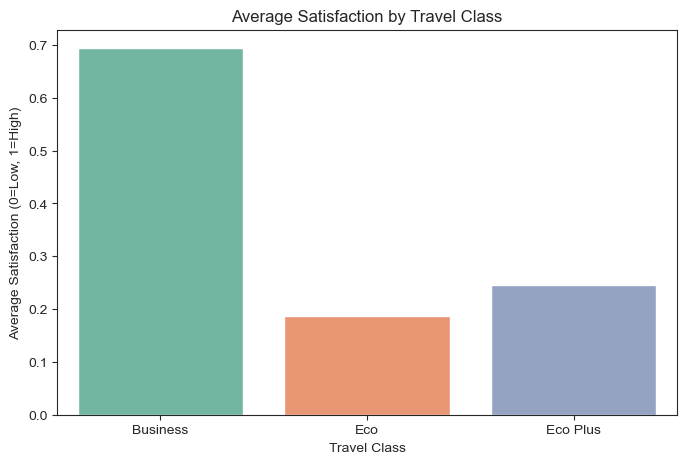

In [146]:
# Class vs Satissfaction
plt.figure(figsize=(8,5))
sns.barplot(data=df_airline, x='class', y='satisfaction_binary', palette='Set2', ci=None)
plt.title('Average Satisfaction by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Average Satisfaction (0=Low, 1=High)')
plt.show()

C:\Users\decent\AppData\Local\Temp\ipykernel_23904\2530489226.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


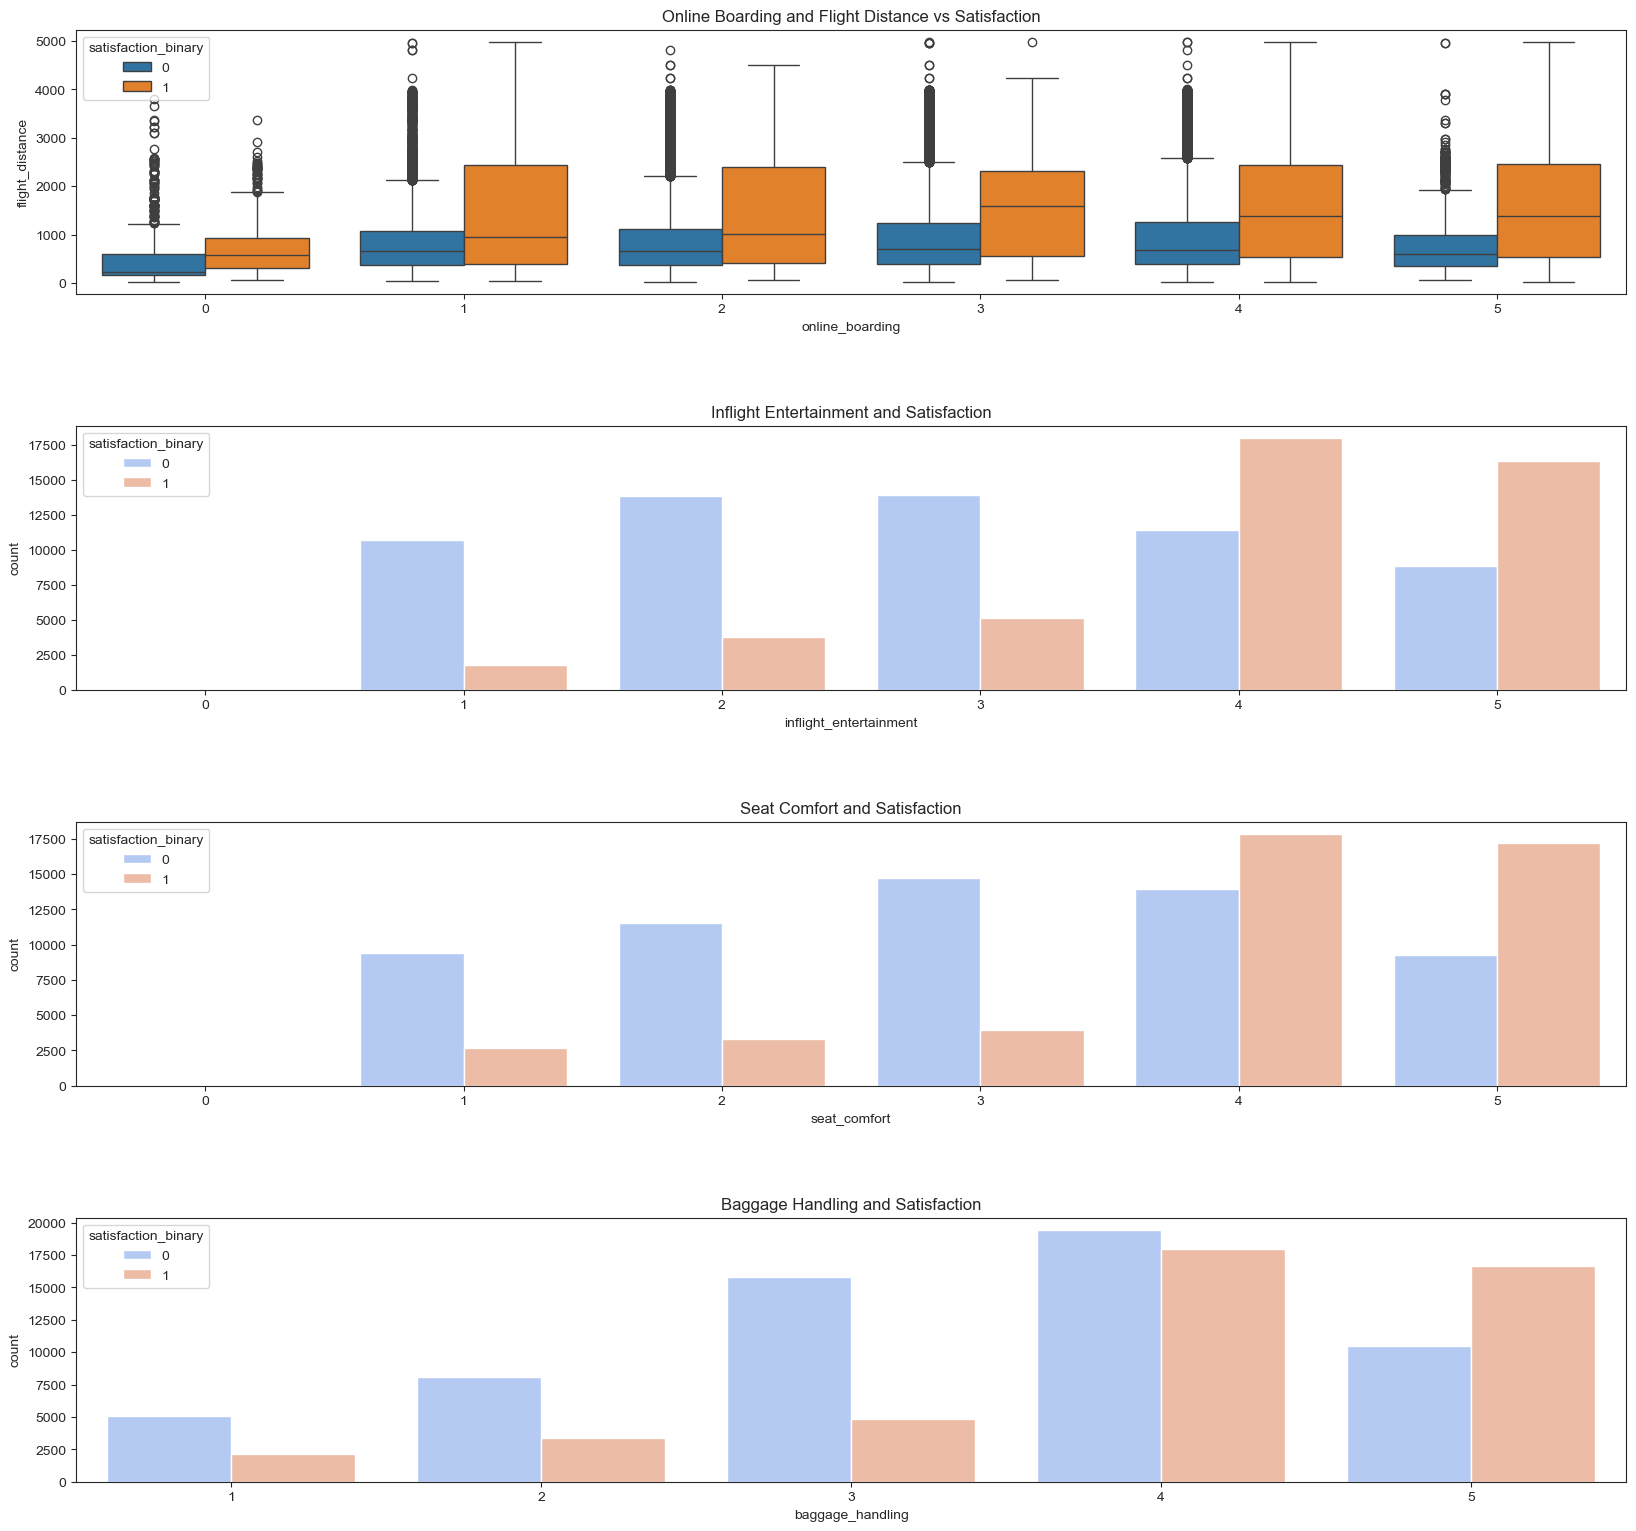

In [156]:
def plot_eda_part2(df_airline):
    fig = plt.figure(figsize=(20, 24))
    grid = plt.GridSpec(5, 1, hspace=0.5)

    # Online Boarding vs Flight Distance
    ax6 = fig.add_subplot(grid[0])
    sns.boxplot(x="online_boarding", y="flight_distance", hue="satisfaction_binary", data=df_airline, ax=ax6)
    ax6.set_title("Online Boarding and Flight Distance vs Satisfaction")

    # Inflight Entertainment vs Satisfaction
    ax8 = fig.add_subplot(grid[1])
    sns.countplot(x="inflight_entertainment", hue="satisfaction_binary", data=df_airline, palette="coolwarm", ax=ax8)
    ax8.set_title("Inflight Entertainment and Satisfaction")

    # Seat Comfort vs Satisfaction
    ax9 = fig.add_subplot(grid[2])
    sns.countplot(x="seat_comfort", hue="satisfaction_binary", data=df_airline, palette="coolwarm", ax=ax9)
    ax9.set_title("Seat Comfort and Satisfaction")

    # Baggage Handling vs Satisfaction
    ax10 = fig.add_subplot(grid[3])
    sns.countplot(x="baggage_handling", hue="satisfaction_binary", data=df_airline, palette="coolwarm", ax=ax10)
    ax10.set_title("Baggage Handling and Satisfaction")

    plt.tight_layout()
    plt.show()

plot_eda_part2(df_airline)


In [ ]:
# Online Boarding vs Flight Distance by Satisfaction: Passengers who rated online boarding higher tend to take longer flights 
#and report greater satisfaction.

# Inflight Entertainment vs Satisfaction: Higher ratings for inflight entertainment strongly correlate with higher satisfaction.

# Seat Comfort vs Satisfaction: Passengers reporting better seat comfort are significantly more likely to be satisfied.

# Baggage Handling vs Satisfaction: Satisfaction increases steadily with higher baggage handling ratings.

# Feature Engineering

In [159]:
# Converting Categorical Columns to Numeric

from sklearn.preprocessing import LabelEncoder

# Columns to label encode
label_cols = ['gender', 'customer_type', 'type_of_travel', 'class', 'online_boarding']

le = LabelEncoder()
for col in label_cols:
    df_airline[col] = le.fit_transform(df_airline[col])


In [161]:
# For high-cardinality or non-ordinal categorical columns we are using One-Hot Encoding

df_airline = pd.get_dummies(df_airline, columns=['inflight_entertainment', 'seat_comfort', 
                                                 'baggage_handling', 'cleanliness'], drop_first=True)


In [163]:
# I already have age_group but ensuring that it is numeric

age_mapping = {'0-18': 0, '19-30': 1, '31-45': 2, '46-60': 3, '60+': 4}
df_airline['age_group'] = df_airline['age_group'].map(age_mapping)


In [165]:
# Creating Flight Distance Groups

bins = [0, 500, 1000, 1500, 2000, 3000, 4000, 5000, 10000]
labels = [0,1,2,3,4,5,6,7]  # numeric groups
df_airline['flight_distance_group'] = pd.cut(df_airline['flight_distance'], bins=bins, labels=labels, right=False)


In [169]:
# Combining feature to make model performance better

# Sum one-hot encoded seat comfort columns
seat_cols = [col for col in df_airline.columns if 'seat_comfort' in col]
entertain_cols = [col for col in df_airline.columns if 'inflight_entertainment' in col]

df_airline['comfort_entertainment'] = df_airline[seat_cols].sum(axis=1) * df_airline[entertain_cols].sum(axis=1)

# Total service score (all relevant one-hot columns)
service_cols = [col for col in df_airline.columns if col in df_airline.columns and
                any(x in col for x in ['inflight_wifi_service','ease_of_online_booking','gate_location',
                                        'food_and_drink','online_boarding','seat_comfort',
                                        'inflight_entertainment','on-board_service','leg_room_service',
                                        'baggage_handling','checkin_service','inflight_service','cleanliness'])]
df_airline['total_service_score'] = df_airline[service_cols].sum(axis=1)



In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Train-test split
X = df_airline.drop('satisfaction', axis=1)
y = df_airline['satisfaction']

In [173]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Modeling

In [ ]:
# Checking Base Accuracy

In [178]:
base_accuracy = df_airline['satisfaction'].value_counts(normalize=True).max()

print(f'Base Accuracy: {base_accuracy:.2%}')

Base Accuracy: 56.67%


In [182]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(le.classes_)  # Check mapping: ['neutral or dissatisfied', 'satisfied']


['neutral or dissatisfied' 'satisfied']


In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df_airline =  pd.read_csv("C:\\Users\\decent\\OneDrive\\Desktop\\Railway_Survey_Analysis\\Airline.csv")


# Drop the 'id' column as it is not needed for modeling
df_airline.drop('id', axis=1, inplace=True)

# Handle missing values in 'Arrival Delay in Minutes'
df_airline['Arrival Delay in Minutes'].fillna(df_airline['Arrival Delay in Minutes'].mean(), inplace=True)

# Define the features (X) and target (y)
X = df_airline.drop('satisfaction', axis=1)
y = df_airline['satisfaction']

# Drop highly correlated features to prevent data leakage and achieve a more realistic accuracy
X = X.drop(['Inflight entertainment', 'Online boarding', 'Seat comfort'], axis=1)

# Identify and one-hot encode the remaining categorical features
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (83123, 21)
Testing data shape: (20781, 21)


C:\Users\decent\AppData\Local\Temp\ipykernel_23904\325766597.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_airline['Arrival Delay in Minutes'].fillna(df_airline['Arrival Delay in Minutes'].mean(), inplace=True)


In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# --- Modeling ---

# 1. Decision Tree Model
print("--- Training Decision Tree Model ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\n" + "="*50 + "\n")

# 2. XGBoost Ensemble Model
print("--- Training XGBoost Model ---")
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

--- Training Decision Tree Model ---
Decision Tree Accuracy: 0.9383090322891102

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     11713
           1       0.93      0.93      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



--- Training XGBoost Model ---


C:\Users\decent\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:48:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9585198017419758

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11713
           1       0.97      0.94      0.95      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



# Validation Curve

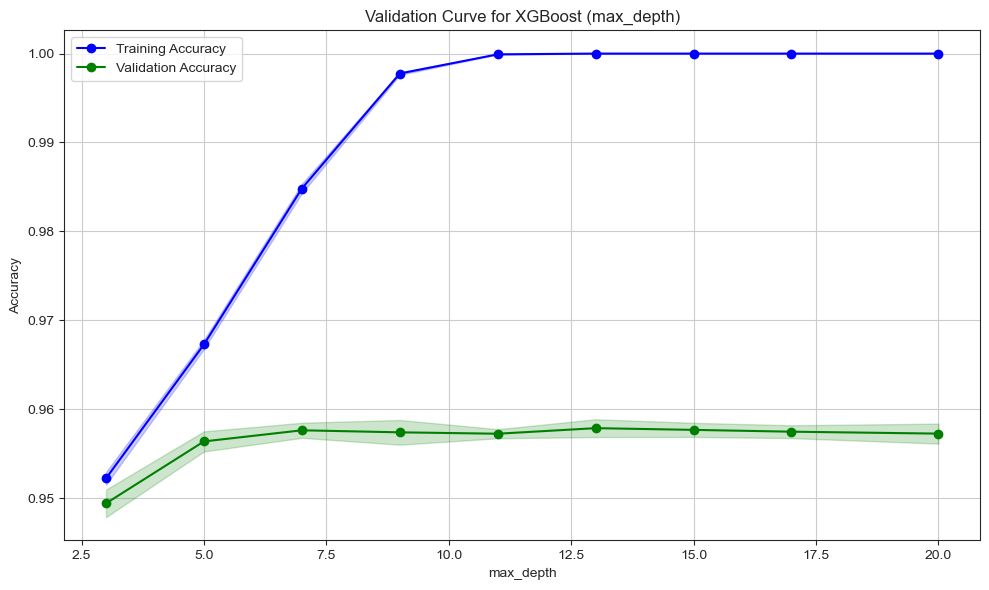

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier

# Define model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Range of values to test for max_depth
param_range = [3, 5, 7, 9, 11, 13, 15, 17, 20]

# Compute validation curve
train_scores, test_scores = validation_curve(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(param_range, test_mean, label="Validation Accuracy", color="green", marker="o")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

plt.title("Validation Curve for XGBoost (max_depth)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


# ROC Curve

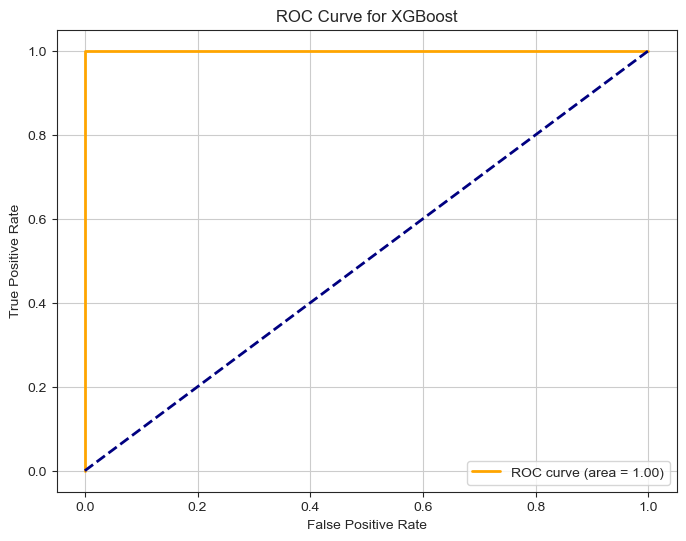

In [236]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Fit the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict probabilities
y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Hyperparameter Tuining

In [245]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Feature and Target Selection ---
X = df_airline[['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
                'Online boarding', "Inflight entertainment", "Seat comfort", "On-board service",
                "Leg room service", "Cleanliness", "Baggage handling", "Inflight service",
                "Checkin service", "Food and drink"]]
y = df_airline['satisfaction']

# --- Encode Target Variable ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 'neutral or dissatisfied' -> 0, 'satisfied' -> 1

# --- One-Hot Encode Categorical Features ---
X_encoded = pd.get_dummies(X, columns=['Type of Travel', 'Class'], drop_first=True)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# --- XGBoost Hyperparameter Grid ---
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)

# --- Grid Search ---
xgb_grid_search = GridSearchCV(estimator=xgb_model,
                               param_grid=xgb_params,
                               cv=5,
                               verbose=2,
                               n_jobs=-1)

# --- Fit Grid Search ---
xgb_grid_search.fit(X_train, y_train)

# --- Best Model ---
xgb_best_model = xgb_grid_search.best_estimator_

# --- Evaluation Function ---
def evaluate_best_model(model, model_name, X_test_data, y_true):
    y_pred = model.predict(X_test_data)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'{model_name} Accuracy (Best Model): {accuracy:.2f}')
    print(f'Classification Report ({model_name}):')
    print(classification_report(y_true, y_pred))
    print(f'Confusion Matrix ({model_name}):')
    print(confusion_matrix(y_true, y_pred))
    print('\n')

# --- Evaluate Best XGBoost Model ---
evaluate_best_model(xgb_best_model, 'XGBoost', X_test, y_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\decent\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:57:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy (Best Model): 0.95
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11713
           1       0.96      0.93      0.95      9068

    accuracy                           0.95     20781
   macro avg       0.96      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

Confusion Matrix (XGBoost):
[[11399   314]
 [  648  8420]]


